In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams

# colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
features = pd.read_csv('../data/Paticlulate Composite.csv', delimiter=',', header=None)

stress_vf5 = pd.read_csv('../data/ParticulateCompositeWithDifferentVolumeFractions/StressData_100_100_VF_5.dat', delim_whitespace=True, header=None)
stress_vf10 = pd.read_csv('../data/ParticulateCompositeWithDifferentVolumeFractions/StressData_100_100_VF_10.dat', delim_whitespace=True, header=None)
stress_vf15 = pd.read_csv('../data/ParticulateCompositeWithDifferentVolumeFractions/StressData_100_100_VF_15.dat', delim_whitespace=True, header=None)
stress_vf20 = pd.read_csv('../data/ParticulateCompositeWithDifferentVolumeFractions/StressData_100_100_VF_20.dat', delim_whitespace=True, header=None)
stress_vf25 = pd.read_csv('../data/ParticulateCompositeWithDifferentVolumeFractions/StressData_100_100_VF_25.dat', delim_whitespace=True, header=None)
stress_vf30 = pd.read_csv('../data/ParticulateCompositeWithDifferentVolumeFractions/StressData_100_100_VF_30.dat', delim_whitespace=True, header=None)

strain = pd.read_csv('../data/ParticulateCompositeWithDifferentVolumeFractions/StrainData.dat', delim_whitespace=True, header=None)

In [3]:
strain = pd.DataFrame(strain.values.reshape(100,1))

In [4]:
stress_vf5 = pd.DataFrame(stress_vf5.values.reshape(10000,1))
stress_vf10 = pd.DataFrame(stress_vf10.values.reshape(10000,1))
stress_vf15 = pd.DataFrame(stress_vf15.values.reshape(10000,1))
stress_vf20 = pd.DataFrame(stress_vf20.values.reshape(10000,1))
stress_vf25 = pd.DataFrame(stress_vf25.values.reshape(10000,1))
stress_vf30 = pd.DataFrame(stress_vf30.values.reshape(10000,1))

In [5]:
features.columns = ['e_m', 'nu_m', 'e_p', 'nu_p']
features.head()

,e_m,nu_m,e_p,nu_p
0,4.280000e+09,0.404,7.490000e+11,0.336
1,5.790000e+09,0.409,1.630000e+11,0.296
2,7.400000e+09,0.405,1.520000e+11,0.345
3,8.840000e+09,0.423,6.100000e+11,0.333
4,3.960000e+09,0.400,2.620000e+11,0.338


In [6]:
features[0] = features.index
features.columns = ['e_m', 'nu_m', 'e_p', 'nu_p', 'merge_on']

strain['merge_on'] = strain.index
strain.columns = ['strain', 'merge_on']

In [7]:
def create_merging_column(df):
    df['merge_on'] = df.index
    df['merge_on'] /= 100
    df['merge_on'] = stress_vf5['merge_on'].astype(int)
    df.columns = ['stress', 'merge_on']
    return df

In [8]:
stress_vf5 = create_merging_column(stress_vf5)
stress_vf10 = create_merging_column(stress_vf10)
stress_vf15 = create_merging_column(stress_vf15)
stress_vf20 = create_merging_column(stress_vf20)
stress_vf25 = create_merging_column(stress_vf25)
stress_vf30 = create_merging_column(stress_vf30)

In [9]:
def merge_stress_features(df):
    df['merge_on'] = df.index%100
    df = pd.merge(df, strain, on='merge_on', how='left')
    df.drop('merge_on', axis=1, inplace=True)
    return df

In [10]:
data_vf5 = pd.merge(stress_vf5, features, on='merge_on', how='left')
data_vf10 = pd.merge(stress_vf10, features, on='merge_on', how='left')
data_vf15 = pd.merge(stress_vf15, features, on='merge_on', how='left')
data_vf20 = pd.merge(stress_vf20, features, on='merge_on', how='left')
data_vf25 = pd.merge(stress_vf25, features, on='merge_on', how='left')
data_vf30 = pd.merge(stress_vf30, features, on='merge_on', how='left')

data_vf5 = merge_stress_features(data_vf5)
data_vf10 = merge_stress_features(data_vf10)
data_vf15 = merge_stress_features(data_vf15)
data_vf20 = merge_stress_features(data_vf20)
data_vf25 = merge_stress_features(data_vf25)
data_vf30 = merge_stress_features(data_vf30)

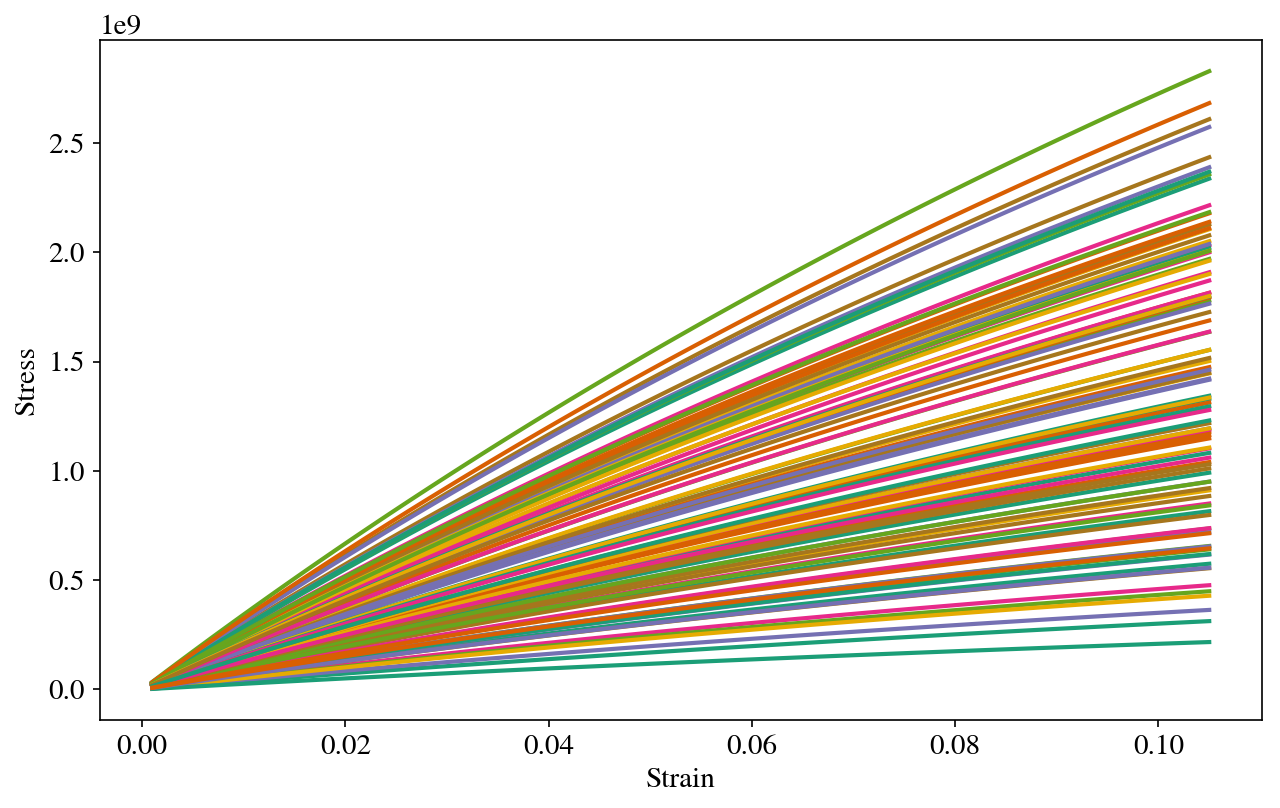

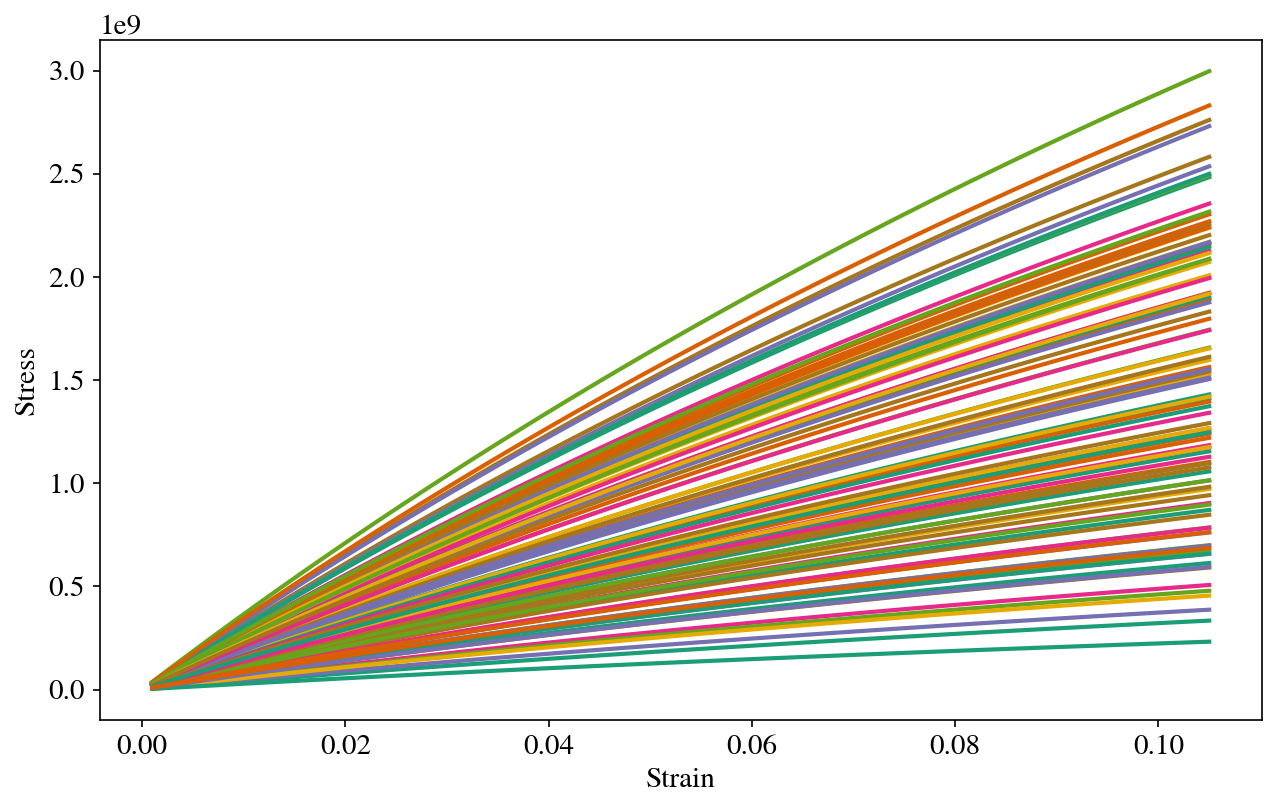

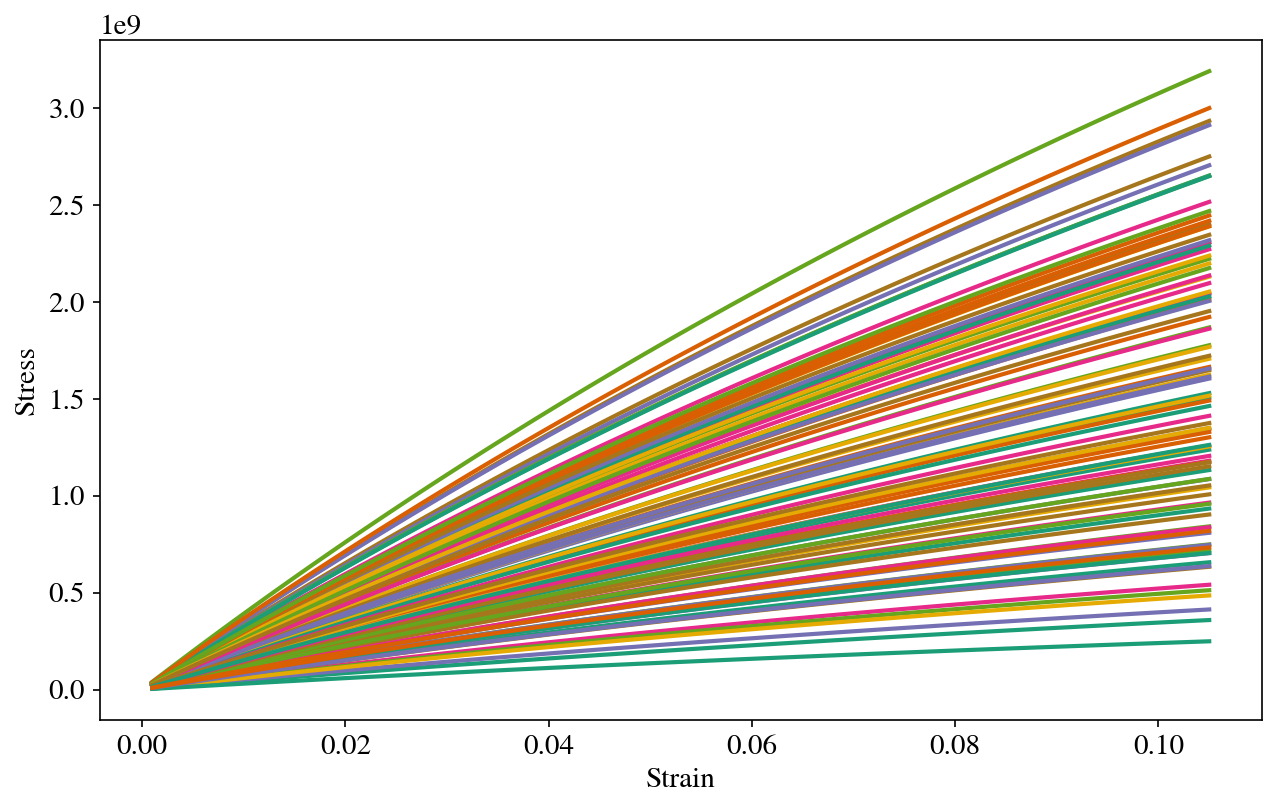

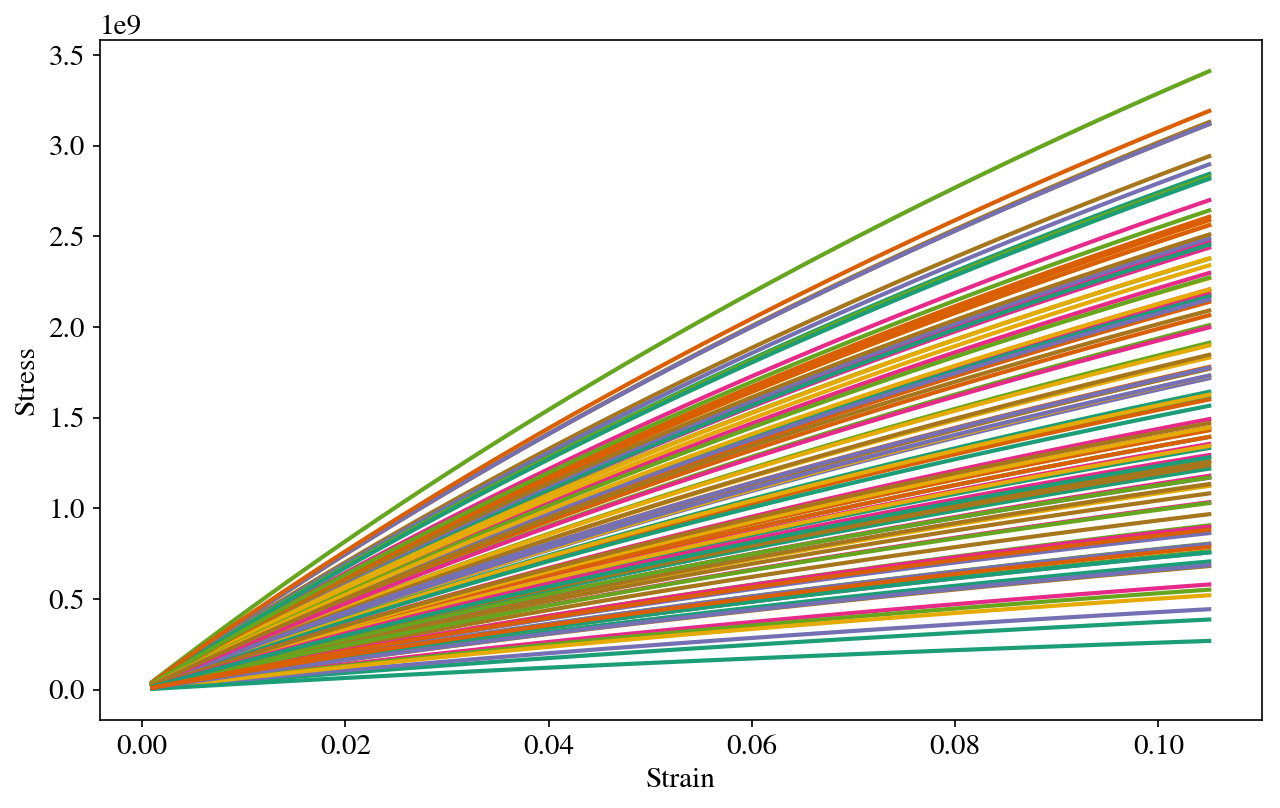

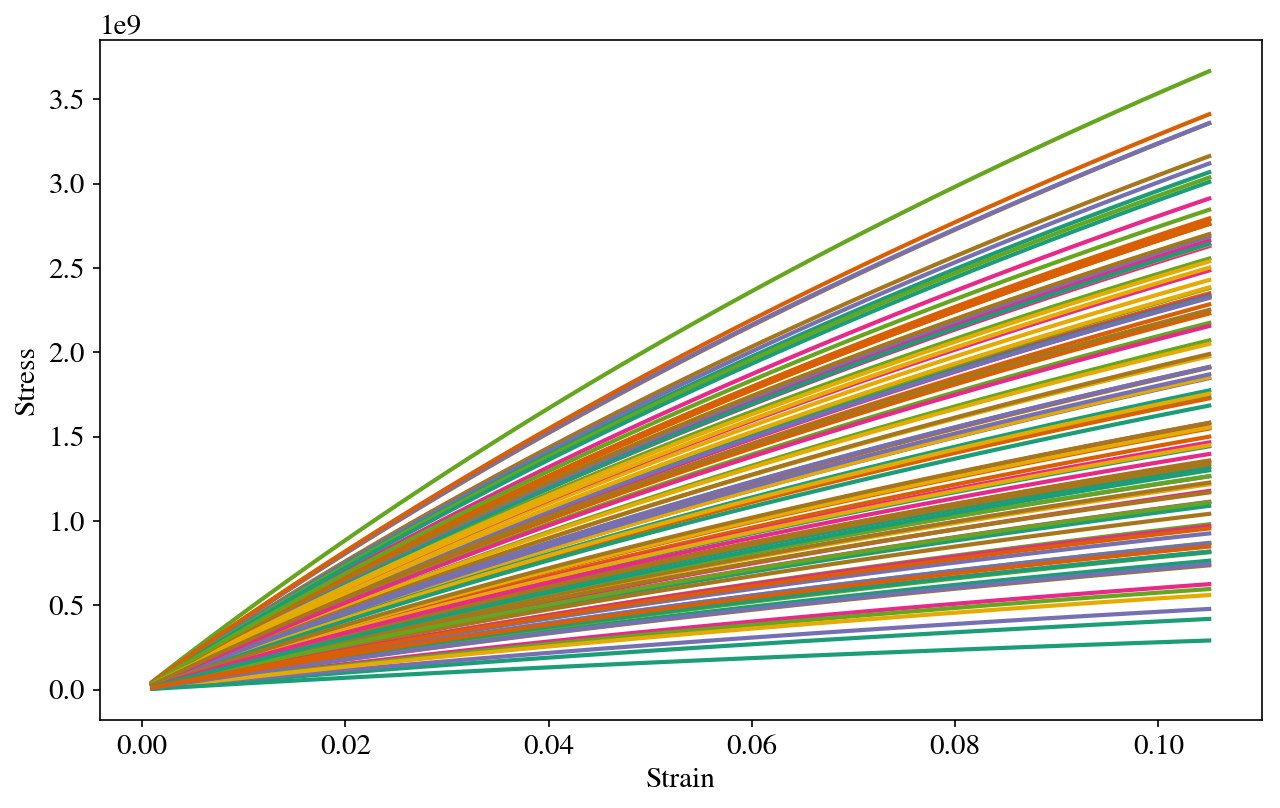

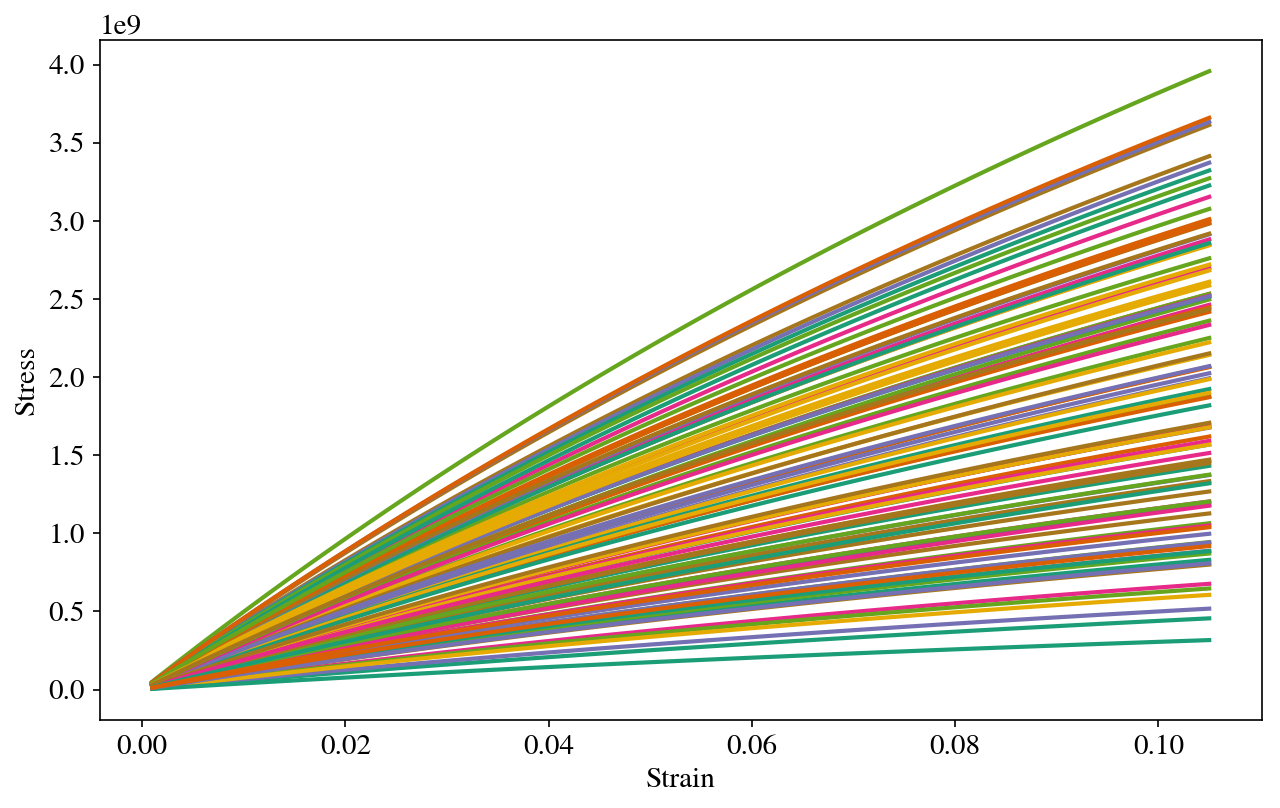

In [11]:
for i in range(100):
    plt.plot(data_vf5.iloc[100*i:100*(i+1)]['strain'], data_vf5.iloc[100*i:100*(i+1)]['stress'])
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.show()
# plt.plot(data.iloc[:100]['strain'], data.iloc[:100]['stress'])

for i in range(100):
    plt.plot(data_vf10.iloc[100*i:100*(i+1)]['strain'], data_vf10.iloc[100*i:100*(i+1)]['stress'])
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.show()
# plt.plot(data.iloc[:100]['strain'], data.iloc[:100]['stress'])

for i in range(100):
    plt.plot(data_vf15.iloc[100*i:100*(i+1)]['strain'], data_vf15.iloc[100*i:100*(i+1)]['stress'])
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.show()
# plt.plot(data.iloc[:100]['strain'], data.iloc[:100]['stress'])

for i in range(100):
    plt.plot(data_vf20.iloc[100*i:100*(i+1)]['strain'], data_vf20.iloc[100*i:100*(i+1)]['stress'])
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.show()
# plt.plot(data.iloc[:100]['strain'], data.iloc[:100]['stress'])

for i in range(100):
    plt.plot(data_vf25.iloc[100*i:100*(i+1)]['strain'], data_vf25.iloc[100*i:100*(i+1)]['stress'])
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.show()
# plt.plot(data.iloc[:100]['strain'], data.iloc[:100]['stress'])

for i in range(100):
    plt.plot(data_vf30.iloc[100*i:100*(i+1)]['strain'], data_vf30.iloc[100*i:100*(i+1)]['stress'])
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.show()
# plt.plot(data.iloc[:100]['strain'], data.iloc[:100]['stress'])

In [12]:
data_vf5['vf'] = 5
data_vf10['vf'] = 10
data_vf15['vf'] = 15
data_vf20['vf'] = 20
data_vf25['vf'] = 25
data_vf30['vf'] = 30

In [13]:
data = pd.concat([data_vf5,data_vf10,data_vf15,data_vf20,data_vf25,data_vf30])

In [14]:
data.head()

,stress,e_m,nu_m,e_p,nu_p,strain,vf
0,10044000.0,4.280000e+09,0.404,7.490000e+11,0.336,0.001001,5
1,20042000.0,4.280000e+09,0.404,7.490000e+11,0.336,0.002002,5
2,29996000.0,4.280000e+09,0.404,7.490000e+11,0.336,0.003004,5
3,39906000.0,4.280000e+09,0.404,7.490000e+11,0.336,0.004008,5
4,49771000.0,4.280000e+09,0.404,7.490000e+11,0.336,0.005012,5


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
clf = LinearRegression()
print np.mean(cross_val_score(clf, data.drop('stress', axis=1), data['stress'], cv = 4, scoring='r2'))

0.862347391583


In [17]:
test = data[data['vf'] == 20]
train = data[data['vf'] != 20]

In [18]:
rf = RandomForestRegressor(n_estimators=200)
print np.mean(cross_val_score(rf, train.drop('stress', axis=1), train['stress'], cv=5, scoring='r2'))

0.985969080542


In [19]:
rf.fit(train.drop('stress', axis=1), train['stress'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [20]:
test['predict'] = rf.predict(test.drop('stress', axis=1))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
np.sqrt(mean_squared_error(test['predict'], test['stress']))

93362684.875683606

In [22]:
rf.feature_importances_

array([ 0.38292902,  0.04756652,  0.00259016,  0.00183818,  0.52014804,
        0.04492808])

In [23]:
test[(test.index == 300) | (test.index == 0)]

,stress,e_m,nu_m,e_p,nu_p,strain,vf,predict
0,17479000.0,4.280000e+09,0.404,7.490000e+11,0.336,0.001001,20,11813995.0
300,30805000.0,8.840000e+09,0.423,6.100000e+11,0.333,0.001001,20,28081705.0


In [24]:
test.shape

(10000, 8)

In [25]:
to_print = test[400:500]

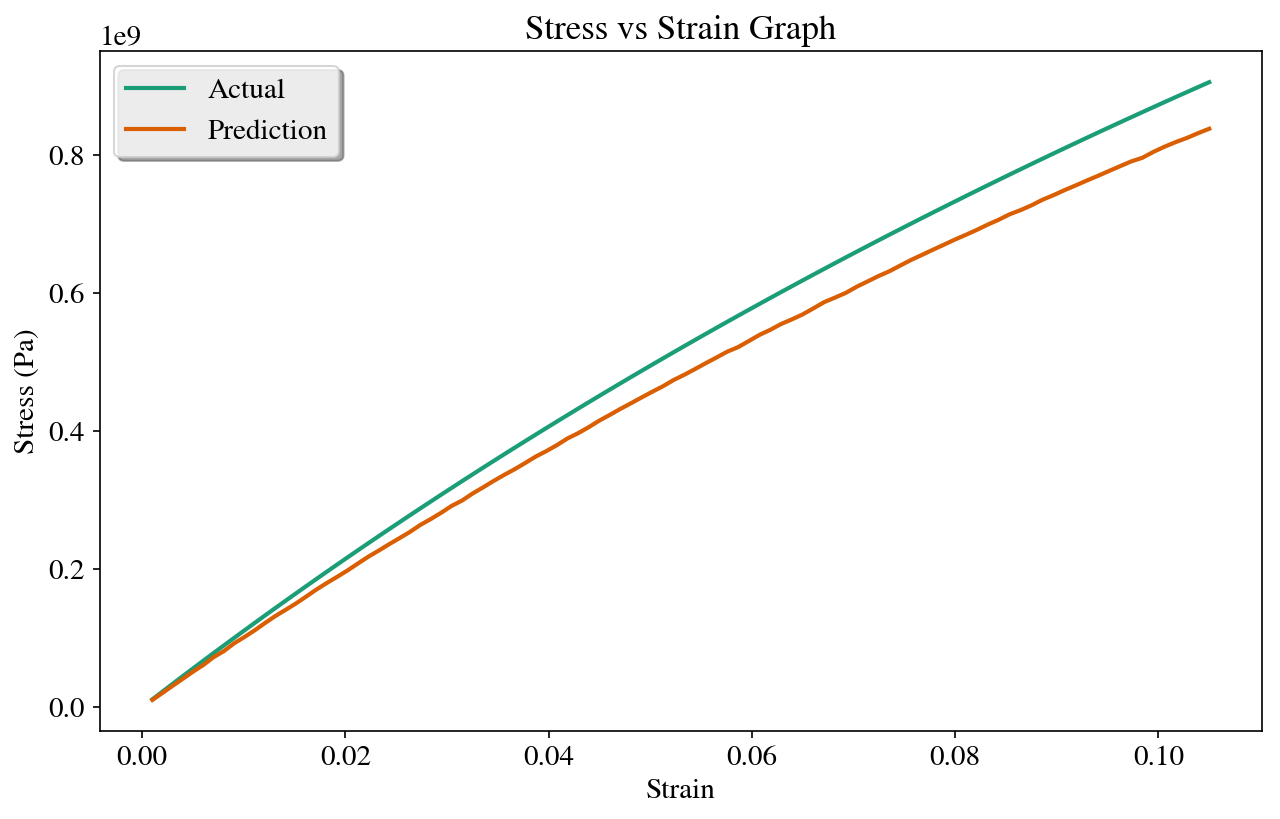

In [26]:
import matplotlib.patches as mpatches

# plt.plot(test['strain'],test['stress'], color = 'g')
# plt.plot(test['strain'],test['predict'], color = 'b')
fig, ax = plt.subplots()
ax.plot(to_print['strain'],to_print['stress'],label='Actual')
ax.plot(to_print['strain'],to_print['predict'],label='Prediction')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=True)
# predicted = mpatches.Patch(color='blue', label='Predicted')
# actual = mpatches.Patch(color='green', label='Actual')
# plt.legend(handles=[actual], loc = 'upper left')
plt.title('Stress vs Strain Graph')
plt.xlabel('Strain')
plt.ylabel('Stress (Pa)')
plt.show()